In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [84]:
pd.options.display.max_columns = None

In [85]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-health-indicators-dataset


In [86]:
data = pd.read_csv(path + '/heart_disease_health_indicators_BRFSS2015.csv')

In [87]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [88]:
print(f'Nº de columnas: {data.shape[1]} \nNº de filas: {data.shape[0]}')

Nº de columnas: 22 
Nº de filas: 253680


**PRIMERAS OBSERVACIONES:**
- LOS DATOS YA VIENEN CODIFICADOS, HAY ALGUNAS COLUMNAS QUE NO SE PODRAN USAR COMO EDUCATION O INCOME YA QUE NO TENGO NINGUNA INFO DE COMO SE HAN CLUSTERIZADO
- POR OTRO LADO, AGE SI QUE PONE EN LA DESCRIPCIÓN COMO SE HAN HECHO LOS GRUPOS

In [89]:
data = data.drop(['Income','Education','NoDocbcCost'],axis=1)

In [90]:
len(data)

253680

In [91]:
data.drop_duplicates(inplace=True)

In [92]:
len(data)

192203

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192203 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  192203 non-null  float64
 1   HighBP                192203 non-null  float64
 2   HighChol              192203 non-null  float64
 3   CholCheck             192203 non-null  float64
 4   BMI                   192203 non-null  float64
 5   Smoker                192203 non-null  float64
 6   Stroke                192203 non-null  float64
 7   Diabetes              192203 non-null  float64
 8   PhysActivity          192203 non-null  float64
 9   Fruits                192203 non-null  float64
 10  Veggies               192203 non-null  float64
 11  HvyAlcoholConsump     192203 non-null  float64
 12  AnyHealthcare         192203 non-null  float64
 13  GenHlth               192203 non-null  float64
 14  MentHlth              192203 non-null  float64
 15  PhysH

 # DISTRIBUCIONES DE LAS VARIABLES

In [94]:
columnas_binarias = []
columnas_no_binarias = []
for columna in data.columns:
  if len(data[columna].unique()) == 2:
    columnas_binarias.append(columna)
  else:
    columnas_no_binarias.append(columna)

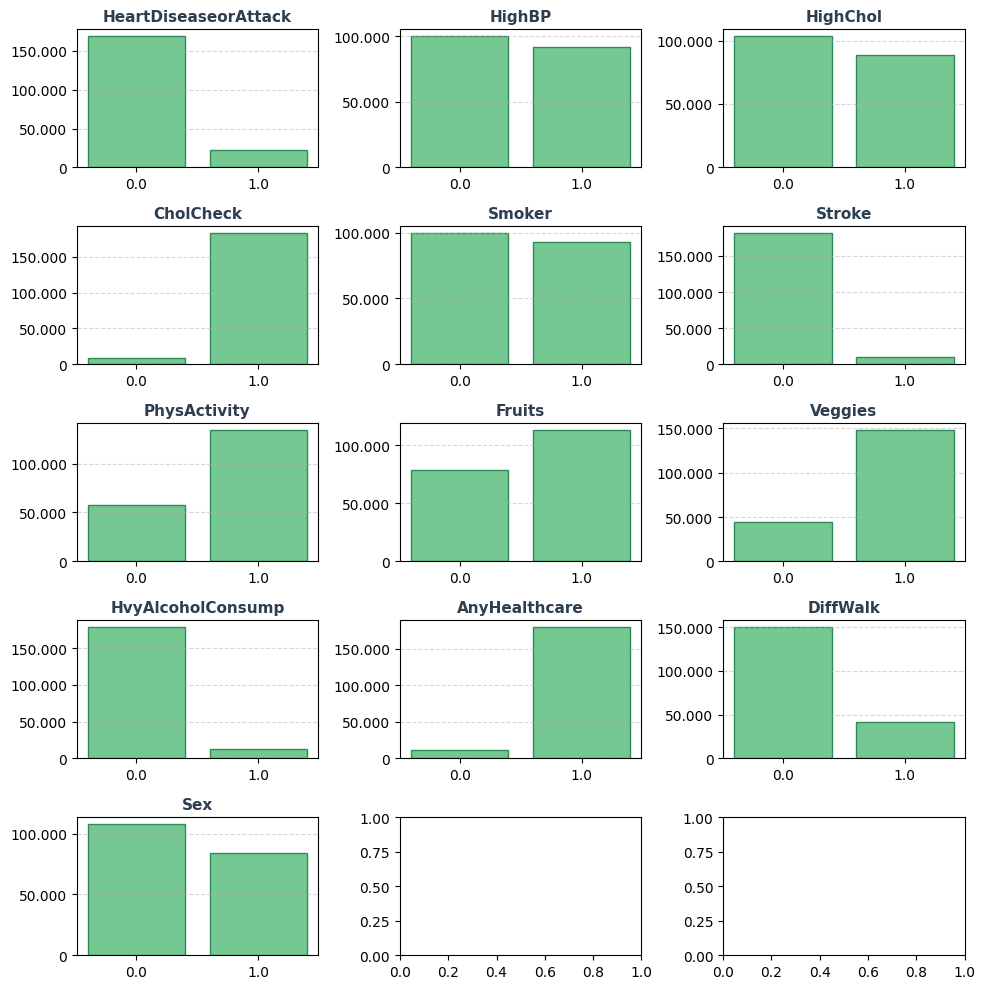

In [95]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(columnas_binarias):
    axes[i].set_title(col, fontsize=11, fontweight='bold', color='#2c3e50')
    counts = data[col].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values, color='#76c893', edgecolor='#2e8b57')

    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.tight_layout()
plt.show()


En el primer grafico que representa la variable target se observa una fuerte descompensación por lo que mas adelante se procedera a aplicar tecnicas de submuestreo

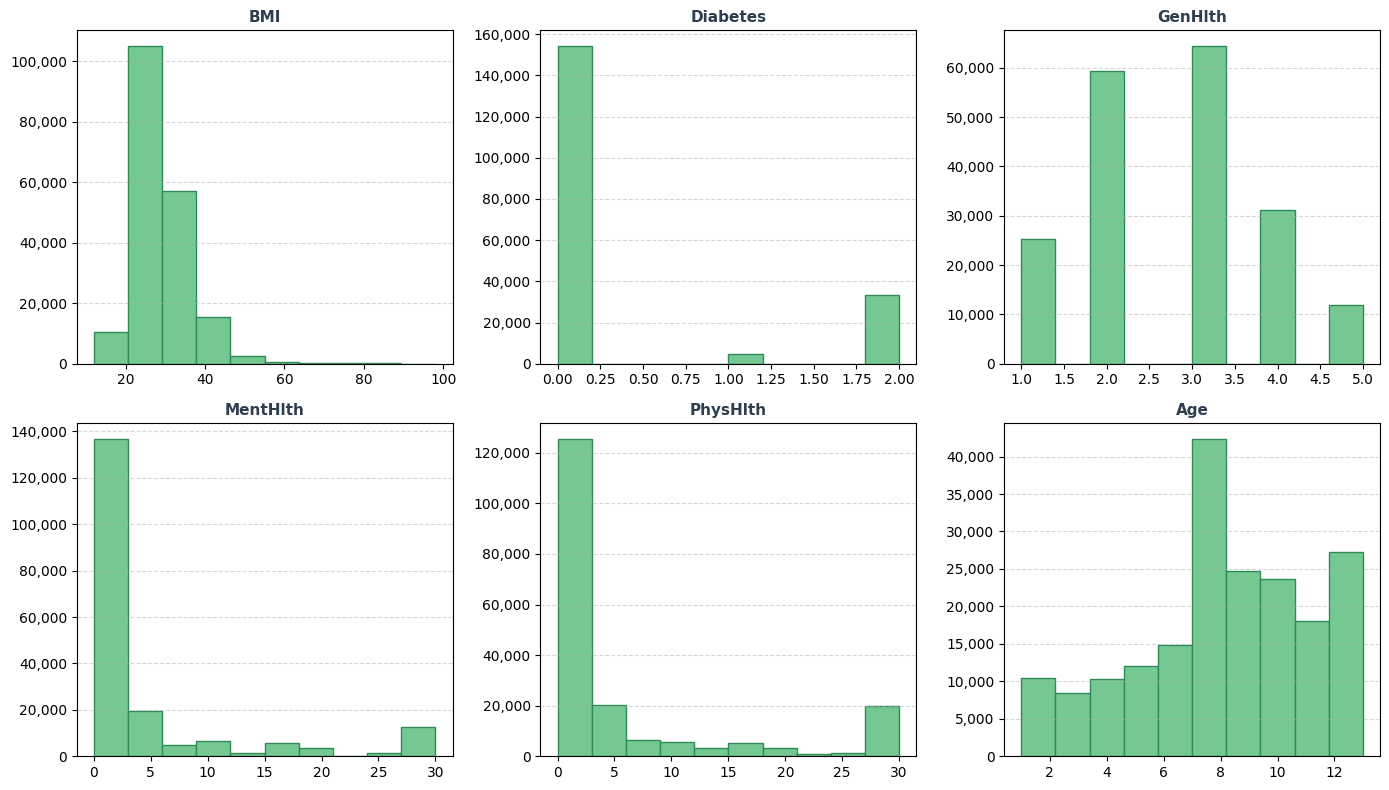

In [96]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(columnas_no_binarias):
    axes[i].set_title(col, fontsize=11, fontweight='bold', color='#2c3e50')
    counts, bins, patches = axes[i].hist(data[col], bins=10, color='#76c893', edgecolor='#2e8b57')

    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.tight_layout()
plt.show()

In [97]:
columnas_no_binarias_sin_diabetes = [col for col in columnas_no_binarias if col != 'Diabetes']

In [98]:
data[columnas_no_binarias_sin_diabetes].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age
count,192203.000000,192203.000000,192203.000000,192203.000000,192203.000000
mean,29.088646,2.715135,4.144368,5.533280,8.070290
std,7.133783,1.079399,8.247636,9.605973,3.098537
min,12.000000,1.000000,0.000000,0.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000
50%,28.000000,3.000000,0.000000,0.000000,8.000000
75%,32.000000,3.000000,4.000000,5.000000,10.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000


# CORRELACIONES

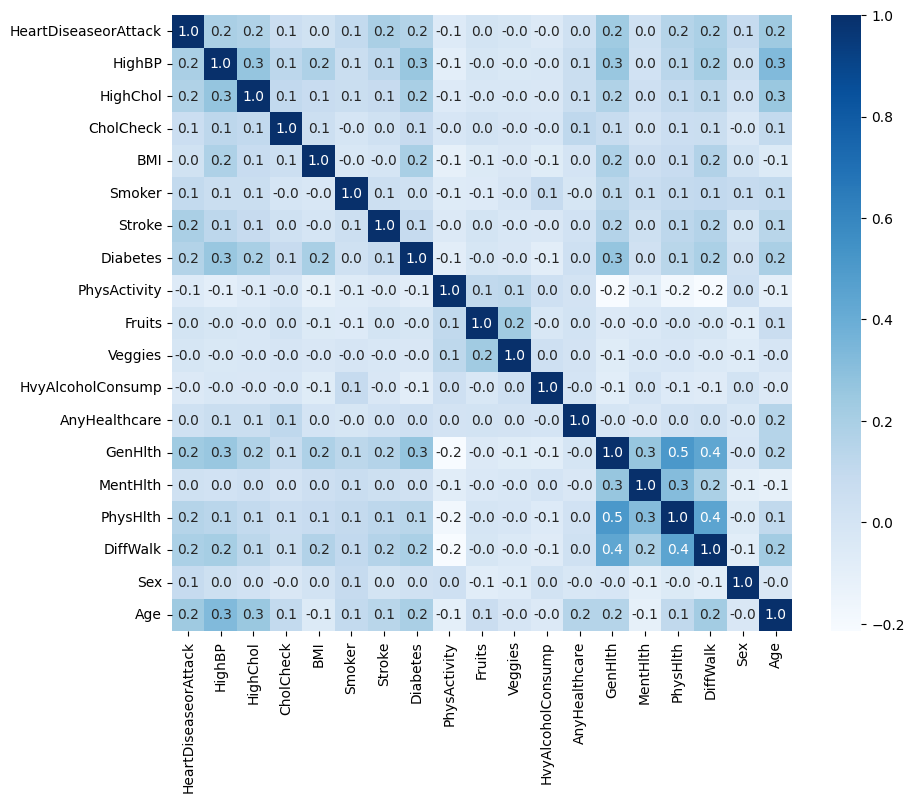

In [99]:
correlaciones = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".1f", cmap="Blues")
plt.show()

# PROCESAMIENTO

## LIMPIAR OUTLIERS

In [100]:
from sklearn.ensemble import IsolationForest

In [101]:
def quitar_outliers(columnas, data = data):
  forest = IsolationForest(contamination=0.05, random_state=100303)
  data['outlier'] = forest.fit_predict(data[columnas])
  data = data[data['outlier'] == 1]
  return data

## CODFICAR, ESCALAR Y NORMALIZAR

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [103]:
def normalizar_standar(columnas, data = data):
  data = data.copy()
  encoders = {}
  for col in columnas:
    encoders[col] = StandardScaler()
    data.loc[:, f'{col}_esc'] = encoders[col].fit_transform(data[[col]])
  return data, encoders, columnas



In [104]:
def normalizar_mm(columnas, data=data):
  data = data.copy()
  encoders_norm = {}
  for col in columnas:
    encoders_norm[col] = MinMaxScaler()
    data.loc[:, f'{col}_esc'] = encoders_norm[col].fit_transform(data[[col]])
  return data, encoders_norm, columnas


Documentacion codigo:
- Pongo col entre [ ] para que no salte un error de formato no esperado.
- Hago una copia del df para evitar errores al crear una nueva columna con el .loc

In [105]:
def enc_ohe(columnas, data):
  encoders_ohe = {}
  for col in columnas:
    encoders_ohe[col] = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
    enc_cols = encoders_ohe[col].fit_transform(data[[col]])
    data = pd.concat([data, enc_cols], axis=1)
  return encoders_ohe, columnas, data

## SUBMUESTREO

In [106]:
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split

**TIPOS DE SUBMUESTREO:**
- ESTRATIFICADO: Manentiene las proporciones de las variables que se le indican
- K-MEANS: Mantiene las proporciones
- RANDOM


### POR CLUSTER

In [107]:
def submuestreo(target_1_data):
  kmeans = KMeans(
    n_clusters=24000,
    init='k-means++',
    n_init=2,
    random_state=100303,
  )

  bgm = BayesianGaussianMixture(
      n_components = 10,
      covariance_type='full',
      random_state = 100303
  )
  target_0_data.loc[ : ,'Cluster'] = bgm.fit_predict(target_0_data.drop('HeartDiseaseorAttack',axis=1))
  n_clusters = target_0_data.Cluster.nunique()
  muestras_por_cluster = int(target_1_data.shape[0]/n_clusters)
  target_0_data = target_0_data.groupby('Cluster').apply(lambda df: df.sample(min(len(df), muestras_por_cluster), random_state=100303))


Cuando se calculan las muestras_por_cluster puede que ese numero sea mayor que el numero de registros asignados a ese cluster por el bgm entonces, uso la funcion min() al usar el apply(), seria un preventor de errores.

### POR TRAIN_TEST_SPLIT CON STRATIFY

In [108]:
def submuestreo_stratify(datos, porcentaje, col_stratify):
  _, submuestreo = train_test_split(datos,
                       test_size=porcentaje,
                       random_state=100303,
                       stratify=datos[col_stratify])
  return submuestreo



### RANDOM

In [109]:
def submuestreo_random(datos, n_muestras):
  submuestreo = datos.sample(n = n_muestras, random_state=18, axis=0)
  return submuestreo

# SPLIT DE LOS DATOS TRAIN, TEST Y VAL

# DEEP LEARNING

In [110]:
pip install keras-tuner lightgbm xgboost -q

In [111]:
from keras import Model, Sequential, Input
from keras.layers import Dense, Dropout
from keras.activations import relu, sigmoid
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from kerastuner.tuners import RandomSearch
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import joblib

# FUNCION EJECUTAR

In [112]:
def datos(norm_stan: bool , columnas_stan: list, norm_mm: bool, columnas_mm: list, cod_ohe: bool, columnas_ohe: list, submuestreo: str,columnas_outlier: list, data = data):
  data = quitar_outliers(columnas_outlier)
  if norm_stan:
     data, encoders_stan, columans_stan = normalizar_standar(columnas_stan, data)
  if norm_mm:
   data, encodeers_mm, columnas_mm = normalizar_mm(columnas_mm, data)
  if cod_ohe:
    encoders_ohe, columnas_ohe, data = enc_ohe(columnas_ohe, data)

  target_0_data = data[data['HeartDiseaseorAttack'] == 0].copy()
  target_1_data = data[data['HeartDiseaseorAttack'] == 1].copy()
  porcentaje = len(target_1_data)/len(target_0_data) # Porcentaje para dejar las muestras balanceadas
  len_target1 = int(len(target_1_data) * 1) # Numero de muestras de la clase 1 multiplicado para que no sea un equilibrio perfecto
  if submuestreo == 'random':
    target_0_data = submuestreo_random(target_0_data, len_target1)

  columnas_eliminar =  ['HeartDiseaseorAttack', 'outlier']  + columnas_stan + columnas_mm  + columnas_ohe
  x = pd.concat([target_0_data,target_1_data],axis=0)
  y = x.HeartDiseaseorAttack
  x = x.drop(columnas_eliminar, axis=1)
  print(x.columns.tolist())
  x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=0.2, stratify=y, random_state=100303
  )

  x_test, x_val, y_test, y_val = train_test_split(
      x_test, y_test, test_size=0.5, stratify=y_test, random_state=100303
  )
  return x_train, x_test, x_val, y_train, y_test, y_val, encoders_stan





In [113]:
def ann(n_capas, input_shape, neuronas):
  modelo = Sequential()
  modelo.add(Input(shape= input_shape))
  for i in range(1, n_capas+1):
    modelo.add(Dense(units = neuronas*i, activation = 'relu'))
    modelo.add(Dropout(0.1))
  modelo.add(Dense(units = 1, activation='sigmoid'))

  modelo.compile(
      optimizer=Adam(learning_rate=0.01),
      loss=binary_crossentropy,
      metrics = ['accuracy'])
  return modelo

def svm():
  modelo = SVC(C=1,kernel='rbf')
  return modelo

def random_forest():
    modelo = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100303)
    return modelo

def lgbm():
   modelo = LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1,verbose=0,  random_state=100303)
   return modelo

def xgboost():
    modelo = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss', random_state=100303)
    return modelo

def evaluar(nombre, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f'Métricas del modelo {nombre}:\n'
          f'Accuracy: {accuracy:.2f}\n'
          f'Precisión: {precision:.2f}\n'
          f'Recall: {recall:.2f}\n'
          f'F1-score: {f1:.2f}')

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicción')
    plt.ylabel('Valor real')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()


def entrenar(ann, svc, random_forest, lgbm_model, xgb_model,
             x_train, x_test, x_val, y_train, y_test, y_val):

    historial_entrenamiento = ann.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))
    ann_preds = ann.predict(x_test).flatten()
    ann_preds = [1 if pred >= 0.5 else 0 for pred in ann_preds]
    evaluar("ANN", y_test, ann_preds)
    ann.save("modelo_ann_corazon.h5")
    ann.save("modelo_ann_corazon.keras")

    svc.fit(x_train, y_train)
    svc_preds = svc.predict(x_test)
    evaluar("SVM", y_test, svc_preds)
    joblib.dump(svc, 'modelo_svm_corazon.pkl')

    random_forest.fit(x_train, y_train)
    rf_preds = random_forest.predict(x_test)
    evaluar("Random Forest", y_test, rf_preds)
    joblib.dump(random_forest, 'modelo_randomforest_corazon.pkl')

    lgbm_model.fit(x_train, y_train)
    lgbm_preds = lgbm_model.predict(x_test)
    evaluar("LightGBM", y_test, lgbm_preds)
    joblib.dump(lgbm_model, 'modelo_lgbm_corazon.pkl')

    xgb_model.fit(x_train, y_train)
    xgb_preds = xgb_model.predict(x_test)
    evaluar("XGBoost", y_test, xgb_preds)
    joblib.dump(xgb_model, 'modelo_xgboost_corazon.pkl')

    return historial_entrenamiento



In [114]:
def keras_tuner(hp,input_shape):
  modelo = Sequential()
  modelo.add(Input(shape=input_shape))
  for i in range(hp.Int('n_capas', max_value=5, min_value=2, step=1)):
    modelo.add(Dense(units=hp.Int(f'neuronas_capa: {i}', max_value=128, min_value=16, step=16), activation=relu))
  modelo.add(Dense(units=1, activation=sigmoid))

  modelo.compile(
      optimizer = Adam(learning_rate = hp.Choice('lr', [0.1, 0.01])),
      loss = binary_crossentropy,
      metrics = ['accuracy']
  )
  return modelo



BMI: 12-98
Diabetes: 0,1 Y 2
GenHlth: 1-5
MentHlth: 0:30
PhysHlth: 0:30
Age

In [115]:
# 'BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age'

In [116]:
columnas_outlier = ['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

In [117]:
columnas_ohe = ['Age']
columnas_stan = ['BMI','Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth','Age']
columnas_mm = ['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

In [118]:
x_train, x_test, x_val, y_train, y_test, y_val, encoders_stan= datos(
    columnas_outlier = columnas_outlier,
    cod_ohe = False, columnas_ohe = columnas_ohe,
    norm_stan= True, columnas_stan = columnas_stan,
    norm_mm = False, columnas_mm = columnas_mm,
    submuestreo = 'random'
)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'DiffWalk', 'Sex', 'BMI_esc', 'Diabetes_esc', 'GenHlth_esc', 'MentHlth_esc', 'PhysHlth_esc', 'Age_esc']


In [119]:
input_shape = (x_test.shape[1],)
ann_modelo = ann(n_capas=2, input_shape=input_shape, neuronas=128)
svm_modelo = svm()
random_forest_model = random_forest()
lgbm_modelo = lgbm()
xgb_modelo = xgboost()


In [120]:
tuner = RandomSearch(
    lambda hp: keras_tuner(hp, input_shape),
    objective='val_accuracy',
    max_trials=40,
    executions_per_trial=1,
    directory='my_dir',
    project_name='ann_tuning'
)
#tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7281 - loss: 0.5445 - val_accuracy: 0.7413 - val_loss: 0.5357
Epoch 2/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7414 - loss: 0.5301 - val_accuracy: 0.7465 - val_loss: 0.5245
Epoch 3/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7440 - loss: 0.5243 - val_accuracy: 0.7472 - val_loss: 0.5259
Epoch 4/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7456 - loss: 0.5197 - val_accuracy: 0.7516 - val_loss: 0.5174
Epoch 5/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7428 - loss: 0.5235 - val_accuracy: 0.7482 - val_loss: 0.5231
Epoch 6/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7423 - loss: 0.5245 - val_accuracy: 0.7438 - val_loss: 0.5301
Epoch 7/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7507 - loss: 0.5143 - val_accuracy: 0.7460 - val_loss: 0.5256
Epoch 8/30
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7437 - loss: 0.5220 

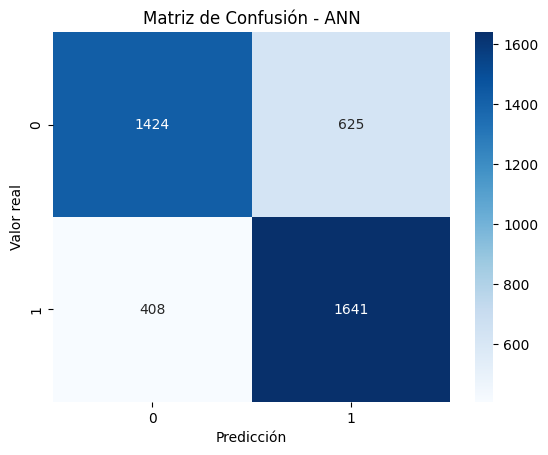

Métricas del modelo SVM:
Accuracy: 0.76
Precisión: 0.74
Recall: 0.81
F1-score: 0.77


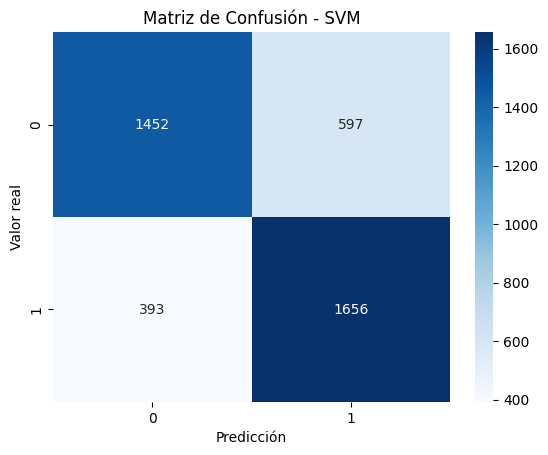

Métricas del modelo Random Forest:
Accuracy: 0.76
Precisión: 0.74
Recall: 0.81
F1-score: 0.77


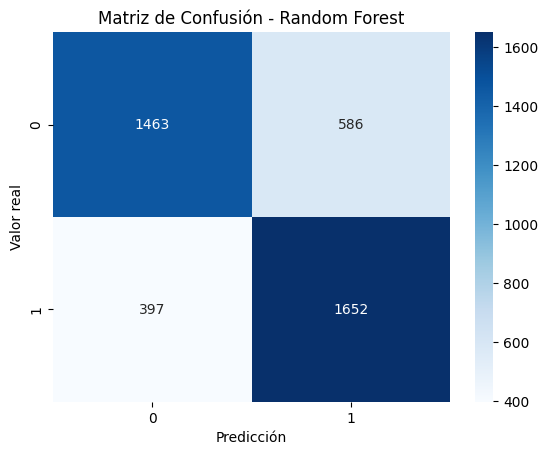

Métricas del modelo LightGBM:
Accuracy: 0.76
Precisión: 0.74
Recall: 0.79
F1-score: 0.77


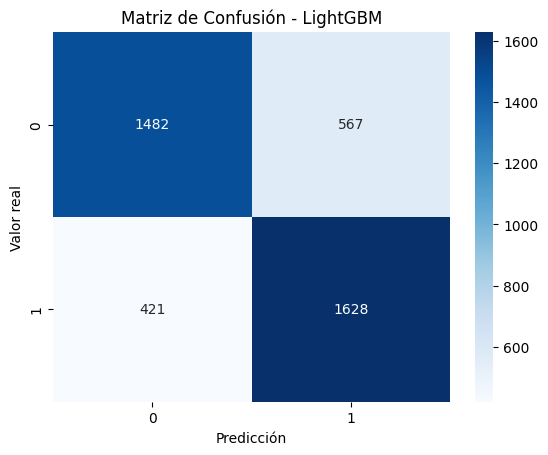

Métricas del modelo XGBoost:
Accuracy: 0.76
Precisión: 0.74
Recall: 0.79
F1-score: 0.77


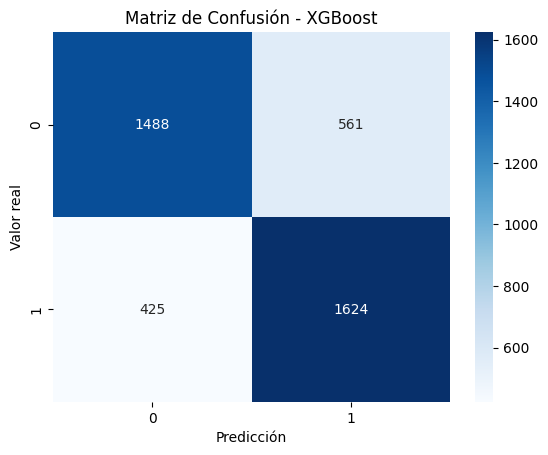

In [121]:
historial = entrenar(
    ann_modelo,
    svm_modelo,
    random_forest_model,
    lgbm_modelo,
    xgb_modelo,
    x_train, x_test, x_val, y_train, y_test, y_val
)

In [122]:
import pickle
with open('historial_modelo_corazon.pkl', 'wb') as file:
    pickle.dump(historial, file)

In [123]:
joblib.dump(encoders_stan, 'encoders_standar_corazon.pkl')

['encoders_standar_corazon.pkl']